In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
games = pd.read_csv('../DATA/games.csv')
games.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [190]:
games.info(),games.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


(None,
          created_at  last_move_at         turns  white_rating  black_rating  \
 count  2.005800e+04  2.005800e+04  20058.000000  20058.000000  20058.000000   
 mean   1.483617e+12  1.483618e+12     60.465999   1596.631868   1588.831987   
 std    2.850151e+10  2.850140e+10     33.570585    291.253376    291.036126   
 min    1.376772e+12  1.376772e+12      1.000000    784.000000    789.000000   
 25%    1.477548e+12  1.477548e+12     37.000000   1398.000000   1391.000000   
 50%    1.496010e+12  1.496010e+12     55.000000   1567.000000   1562.000000   
 75%    1.503170e+12  1.503170e+12     79.000000   1793.000000   1784.000000   
 max    1.504493e+12  1.504494e+12    349.000000   2700.000000   2723.000000   
 
         opening_ply  
 count  20058.000000  
 mean       4.816981  
 std        2.797152  
 min        1.000000  
 25%        3.000000  
 50%        4.000000  
 75%        6.000000  
 max       28.000000  )

In [191]:
games.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [192]:
games.corr()

,rated,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
rated,1.000000,-0.001171,-0.001176,0.090698,0.003284,0.032655,-0.001906
created_at,-0.001171,1.000000,1.000000,0.083185,0.116170,0.133316,0.100201
last_move_at,-0.001176,1.000000,1.000000,0.083196,0.116172,0.133318,0.100203
turns,0.090698,0.083185,0.083196,1.000000,0.129753,0.160467,0.055999
white_rating,0.003284,0.116170,0.116172,0.129753,1.000000,0.634171,0.277379
black_rating,0.032655,0.133316,0.133318,0.160467,0.634171,1.000000,0.255396
opening_ply,-0.001906,0.100201,0.100203,0.055999,0.277379,0.255396,1.000000


In [193]:
# Lets Explore Categorial Features
games.select_dtypes(['object']).columns

Index(['id', 'victory_status', 'winner', 'increment_code', 'white_id',
       'black_id', 'moves', 'opening_eco', 'opening_name'],
      dtype='object')

In [194]:
games['id'].value_counts() # Which means that players didn't played a lot of games

XRuQPSzH    5
GstYv2mJ    4
LyRqbD4d    4
mJ9VpdxV    4
h0YsGMhj    4
           ..
rsEgYfgO    1
qnhXn8XO    1
PREaBSqk    1
C1JCoZAG    1
Be2m2x3C    1
Name: id, Length: 19113, dtype: int64

In [195]:
games['winner'].value_counts()

white    10001
black     9107
draw       950
Name: winner, dtype: int64

In [196]:
games['victory_status'].value_counts()

resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64

<AxesSubplot:xlabel='victory_status', ylabel='count'>

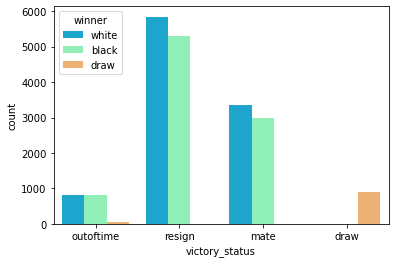

In [197]:
sns.countplot(x='victory_status',data=games,hue='winner',palette='rainbow')
# Clearly See that there is no connection between color of player to winning.

<AxesSubplot:xlabel='victory_status', ylabel='count'>

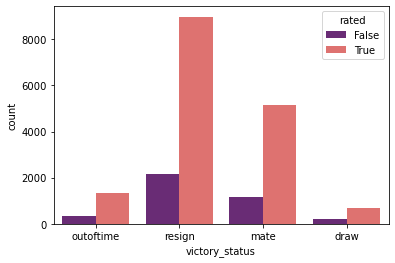

In [198]:
sns.countplot(x='victory_status',data=games,hue='rated',palette='magma')
# A Strong Connection between rated and resigning - which means that rated players are nobel.

In [199]:
# Replaceing true/false with numeric
games.replace(False, 0, inplace=True)
games.replace(True, 1, inplace=True)
games.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,0.0,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,1.0,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,1.0,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,1.0,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,1.0,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [304]:
games['opening_name'].value_counts().sort_values(ascending=False).head(20)

Van't Kruijs Opening                             368
Sicilian Defense                                 358
Sicilian Defense: Bowdler Attack                 296
French Defense: Knight Variation                 271
Scotch Game                                      271
Scandinavian Defense: Mieses-Kotroc Variation    259
Queen's Pawn Game: Mason Attack                  232
Queen's Pawn Game: Chigorin Variation            229
Scandinavian Defense                             223
Horwitz Defense                                  209
Caro-Kann Defense                                199
Philidor Defense #3                              198
Philidor Defense #2                              193
Indian Game                                      181
Italian Game: Anti-Fried Liver Defense           180
Four Knights Game: Italian Variation             176
Modern Defense                                   174
Owen Defense                                     168
King's Pawn Game: Wayward Queen Attack        

In [291]:
games1['turns'].value_counts().sort_values(ascending=False).head()

53    303
45    302
51    299
57    297
39    297
Name: turns, dtype: int64

In [293]:
games1['turns'].mean()

60.46599860404826

In [202]:
# Lets try to understand what effects your possibility to win
winner_dummies = pd.get_dummies(games['winner'])
winner_dummies


,black,draw,white
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
20053,0,0,1
20054,1,0,0
20055,0,0,1
20056,0,0,1


In [203]:
games = pd.concat([games,winner_dummies],axis=1)
games.drop('winner',axis=1,inplace=True)
games.drop('draw',axis=1,inplace=True)
games.head()

,id,rated,created_at,last_move_at,turns,victory_status,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,black,white
0,TZJHLljE,0.0,1.504210e+12,1.504210e+12,13,outoftime,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,0,1
1,l1NXvwaE,1.0,1.504130e+12,1.504130e+12,16,resign,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,1,0
2,mIICvQHh,1.0,1.504130e+12,1.504130e+12,61,mate,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,0,1
3,kWKvrqYL,1.0,1.504110e+12,1.504110e+12,61,mate,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,0,1
4,9tXo1AUZ,1.0,1.504030e+12,1.504030e+12,95,mate,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,0,1


In [204]:
games.select_dtypes(['object']).columns

Index(['id', 'victory_status', 'increment_code', 'white_id', 'black_id',
       'moves', 'opening_eco', 'opening_name'],
      dtype='object')

In [205]:
# Id columnm doesn't effect my data 
games.drop('id',axis=1,inplace=True)
games.select_dtypes(['object']).columns

Index(['victory_status', 'increment_code', 'white_id', 'black_id', 'moves',
       'opening_eco', 'opening_name'],
      dtype='object')

In [206]:
# Getting dummies for victory status
victorystatus_dummies = pd.get_dummies(games['victory_status'],drop_first=True)
victorystatus_dummies

,mate,outoftime,resign
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
20053,0,0,1
20054,1,0,0
20055,1,0,0
20056,0,0,1


In [207]:
games.drop('victory_status',axis=1,inplace=True)
games = pd.concat([games,victorystatus_dummies],axis=1)
games.head()

,rated,created_at,last_move_at,turns,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,black,white,mate,outoftime,resign
0,0.0,1.504210e+12,1.504210e+12,13,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,0,1,0,1,0
1,1.0,1.504130e+12,1.504130e+12,16,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,1,0,0,0,1
2,1.0,1.504130e+12,1.504130e+12,61,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,0,1,1,0,0
3,1.0,1.504110e+12,1.504110e+12,61,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,0,1,1,0,0
4,1.0,1.504030e+12,1.504030e+12,95,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,0,1,1,0,0


In [208]:
# explore object types
games.select_dtypes(['object']).columns

Index(['increment_code', 'white_id', 'black_id', 'moves', 'opening_eco',
       'opening_name'],
      dtype='object')

In [209]:
# Lets Explore top players_move
games['two_moves'] = games['moves'].apply(lambda x: x[:6])



In [210]:
games['two_moves'].value_counts().head(5)

e4 e5     6002
e4 c5     2571
d4 d5     2168
e4 e6     1342
d4 Nf6    1138
Name: two_moves, dtype: int64

In [211]:
# Removing unecessary columns
games.drop(['increment_code','white_id','black_id'],axis=1,inplace=True)

In [212]:
games.select_dtypes(['object']).columns

Index(['moves', 'opening_eco', 'opening_name', 'two_moves'], dtype='object')

In [213]:
games.drop('moves',axis=1,inplace=True)
games.select_dtypes(['object']).columns

Index(['opening_eco', 'opening_name', 'two_moves'], dtype='object')

In [214]:
games['opening_eco'].value_counts().sort_values(ascending=False)
# We can refer to the coding book in the explanation tab, currently can't use it for prediction

A00    1007
C00     844
D00     739
B01     716
C41     691
       ... 
D22       1
A33       1
E03       1
D19       1
D36       1
Name: opening_eco, Length: 365, dtype: int64

In [215]:
games.drop('opening_eco',axis=1,inplace=True)

In [216]:
games.select_dtypes(['object']).columns

Index(['opening_name', 'two_moves'], dtype='object')

In [217]:
games.drop(['opening_name','two_moves'],axis=1,inplace=True)

In [218]:
games.select_dtypes(['object']).columns

Index([], dtype='object')

#Evaluating the model

In [219]:
# View the database again
games.head()

,rated,created_at,last_move_at,turns,white_rating,black_rating,opening_ply,black,white,mate,outoftime,resign
0,0.0,1.504210e+12,1.504210e+12,13,1500,1191,5,0,1,0,1,0
1,1.0,1.504130e+12,1.504130e+12,16,1322,1261,4,1,0,0,0,1
2,1.0,1.504130e+12,1.504130e+12,61,1496,1500,3,0,1,1,0,0
3,1.0,1.504110e+12,1.504110e+12,61,1439,1454,3,0,1,1,0,0
4,1.0,1.504030e+12,1.504030e+12,95,1523,1469,5,0,1,1,0,0


<AxesSubplot:>

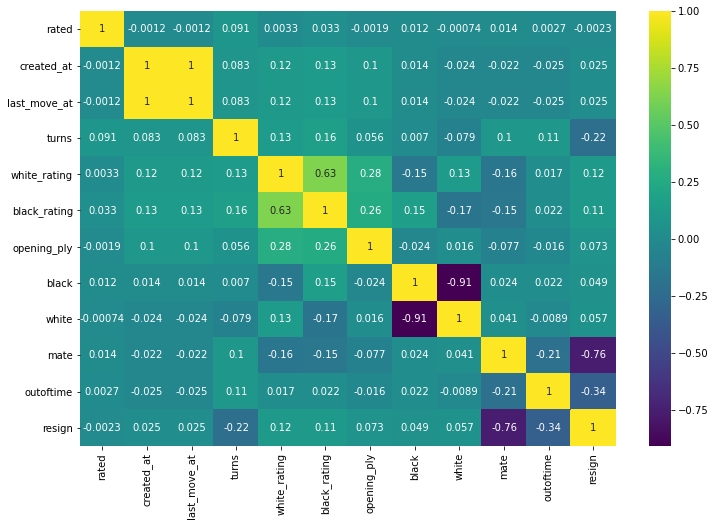

In [220]:
plt.figure(figsize=(12,8))
sns.heatmap(games.corr(),annot=True,cmap='viridis')

In [221]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rated         20058 non-null  float64
 1   created_at    20058 non-null  float64
 2   last_move_at  20058 non-null  float64
 3   turns         20058 non-null  int64  
 4   white_rating  20058 non-null  int64  
 5   black_rating  20058 non-null  int64  
 6   opening_ply   20058 non-null  int64  
 7   black         20058 non-null  uint8  
 8   white         20058 non-null  uint8  
 9   mate          20058 non-null  uint8  
 10  outoftime     20058 non-null  uint8  
 11  resign        20058 non-null  uint8  
dtypes: float64(3), int64(4), uint8(5)
memory usage: 1.2 MB


In [222]:
games['created_at']

0        1.504210e+12
1        1.504130e+12
2        1.504130e+12
3        1.504110e+12
4        1.504030e+12
             ...     
20053    1.499791e+12
20054    1.499698e+12
20055    1.499698e+12
20056    1.499696e+12
20057    1.499643e+12
Name: created_at, Length: 20058, dtype: float64

In [223]:
games['created_at'] = pd.to_datetime(games['created_at'])
games['created_at'].head(5)

0   1970-01-01 00:25:04.210
1   1970-01-01 00:25:04.130
2   1970-01-01 00:25:04.130
3   1970-01-01 00:25:04.110
4   1970-01-01 00:25:04.030
Name: created_at, dtype: datetime64[ns]

In [224]:
games['last_move_at'] = pd.to_datetime(games['last_move_at'])
games['last_move_at'].head(5)

0   1970-01-01 00:25:04.210
1   1970-01-01 00:25:04.130
2   1970-01-01 00:25:04.130
3   1970-01-01 00:25:04.110
4   1970-01-01 00:25:04.030
Name: last_move_at, dtype: datetime64[ns]

In [225]:
games.drop(['last_move_at','created_at'],axis=1,inplace=True)


In [226]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rated         20058 non-null  float64
 1   turns         20058 non-null  int64  
 2   white_rating  20058 non-null  int64  
 3   black_rating  20058 non-null  int64  
 4   opening_ply   20058 non-null  int64  
 5   black         20058 non-null  uint8  
 6   white         20058 non-null  uint8  
 7   mate          20058 non-null  uint8  
 8   outoftime     20058 non-null  uint8  
 9   resign        20058 non-null  uint8  
dtypes: float64(1), int64(4), uint8(5)
memory usage: 881.6 KB


In [271]:
# Evaluate number of moves
X = games.drop('rated',axis=1)
y = games['rated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [272]:
rfc = RandomForestClassifier(n_estimators=2000)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)



In [273]:
print(classification_report(pred_rfc, y_test))
print(confusion_matrix(pred_rfc, y_test))

              precision    recall  f1-score   support

         0.0       0.32      0.74      0.45       505
         1.0       0.97      0.85      0.91      5513

    accuracy                           0.85      6018
   macro avg       0.65      0.80      0.68      6018
weighted avg       0.92      0.85      0.87      6018

[[ 376  129]
 [ 801 4712]]


In [ ]:
# So Basically we see that our model doesn't know how to explain the data that good
# We also saw that there isn't a good coorelation between our variables
# we hav a good accuracy in f1-score, but we truly miss the precision at some points
# sometimes chess may be unpredicatble.
# Lets see if we c

In [284]:
player = games.drop('rated',axis=1).loc[6]
pred_player = rfc.predict(player.values.reshape(1,-1))
pred_player

array([1.])

In [285]:
games['rated'].loc[6]

1.0

In [263]:
# So in that case we predicted correctly if the player was rated or not.

array([67.23388041])